In [1]:
cd ..

/vagrant/src/benchmark-face-reco


In [2]:
from clustering import cluster, plot, chinese_whispers, hierarchical, DBSCAN, tsne
import numpy as np
import pathlib
import random
import cv2
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import cluster as cluster_metrics


In [3]:
def plot_images(images):
    import matplotlib.pyplot as plt
    n_col = 6
    n_row = len(images) // n_col + (len(images) % n_col > 0)
    fig, axs = plt.subplots(n_row, n_col, figsize=(15, n_row * 2.5),
                            gridspec_kw={'wspace': 0.01, 'hspace': 0.01})
    axs = axs.flatten()

    for i, image in enumerate(images):
        axs[i].set_axis_off()
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)

    for rest in range(i+1, len(axs)):
        fig.delaxes(axs[rest])
    return plt


In [4]:
def images_from_cluster(cluster_id, labels_to_filter):
    images = []
    import cv2
    for index in np.where(np.array(labels_to_filter)==cluster_id)[0]:
         images.append(cv2.imread(str((dataset_path / labels[index] /face_ids[index]).with_suffix(".jpg"))))
    return images


# Cluster the faces embedding of a video
1. Load the numpy array containing the embeddings
2. Clusterize
3. Plot TSNE to visualize results

Parameters

In [5]:
dataset_path = pathlib.Path("/vagrant/data/PAD/thesaurus_rts/persons_db")
method = hierarchical


Load the numpy array containg the embeddings

In [6]:
person_paths = [person_path for person_path in dataset_path.iterdir()]
random.seed(0)
person_paths = random.sample(person_paths, 10)

In [7]:
faceprints = []
labels = []
face_ids = []
for person_path in person_paths:
    for faceprint_path in person_path.glob("*.npy"):
        faceprints.append(np.load(faceprint_path, allow_pickle=True))
        labels.append(person_path.name)
        face_ids.append(faceprint_path.stem)
faceprints= np.array(faceprints)

    

Clusterize the embeddings with DBSCAN

In [8]:
clusters = cluster(faceprints, method=method, distance_threshold=2.7)

In [9]:
labels_pred = [0]*len(labels)
for i, cluster_ in enumerate(clusters):
    for point in cluster_:
        labels_pred[point] = i
    

In [10]:
print(homogeneity_completeness_v_measure(labels, labels_pred))

(1.0000000000000002, 1.0, 1.0000000000000002)


In [11]:
convert_class = {label: i for i, label in enumerate(list(set(labels)))}
c = cluster_metrics.contingency_matrix([convert_class[label] for label in labels], labels_pred)

<AxesSubplot:>

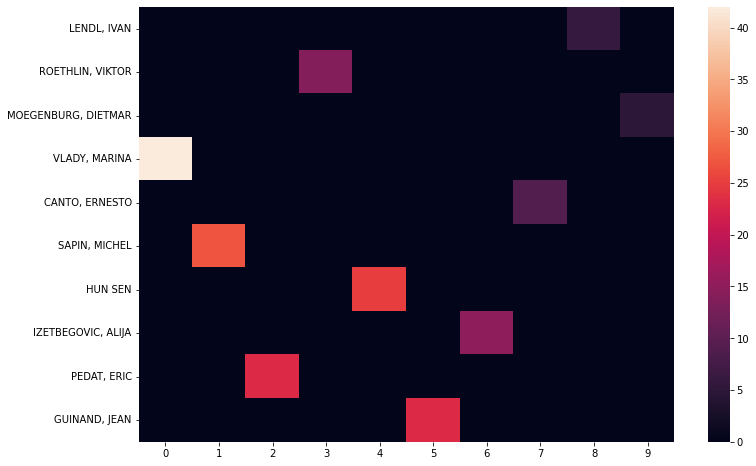

In [12]:
import seaborn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
seaborn.heatmap(c, ax=ax, yticklabels=convert_class.keys())

<module 'matplotlib.pyplot' from '/vagrant/src/benchmark-face-reco/venv/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

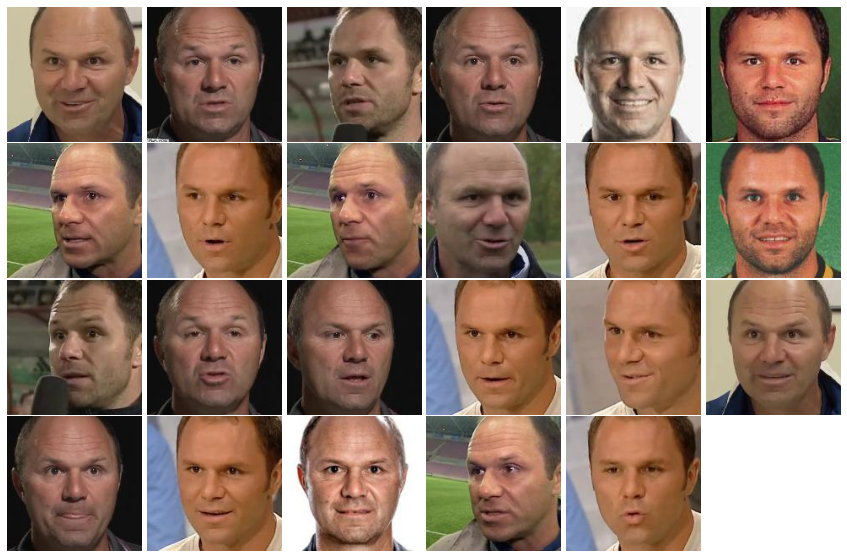

In [13]:
images =  images_from_cluster("PEDAT, ERIC", labels)
plot_images(images)

Plot TSNE and labelled cluster

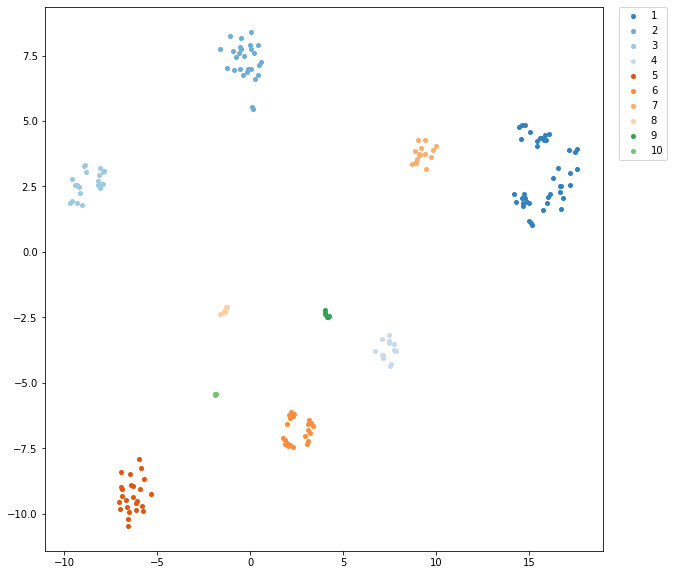

In [14]:
plot(tsne(faceprints), clusters)